## Project Title: 

### Leveraging Data Insights for Sales Optimization in 2019

## 1. Business Understanding


### Project Description
### 1. Introduction
In this project, we aim to design and deliver an end-to-end business intelligence solution leveraging transactional data from 2019 to provide valuable insights for our client. The client has collected data throughout the year but hasn't utilized it effectively to drive sales and improve operational efficiency. Our goal is to analyze the data comprehensively and present actionable insights that will enable the client to identify opportunities for growth and optimization.

### 1.1. Objectives
The main objectives of this project are as follows:

- Analyze the 2019 transactional data to determine the total revenue generated throughout the year.

- Identify any seasonal patterns or trends in sales to understand the seasonality of the business.

- Determine the best-selling and worst-selling products based on sales volume and revenue.

- Compare sales performance across different months or weeks to identify trends and fluctuations.

- Analyze the distribution of product deliveries across cities to identify key markets.

- Compare product categories in terms of revenue generated and quantities ordered to understand their contribution to overall sales.

### 1.2. Analytical  Questions
1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered?

### 1.3. Hypothesis
- Null Hypothesis (H0): The total revenue generated in 2019 is equal to or less than a predetermined benchmark or expectation.

- Alternative Hypothesis (H1): The total revenue generated in 2019 is greater than the predetermined benchmark or expectation.

### 1.4. Methodology
To achieve these objectives, we will follow a systematic methodology that includes the following steps:

1. Data Collection: Retrieve transactional data for the entire year of 2019 from both CSV files (January to June) and the remote database (July to December).

2. Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and inconsistencies.

3. Exploratory Data Analysis (EDA): Conduct exploratory data analysis to gain insights into the distribution, trends, and patterns within the data.

4. Statistical Analysis: Perform statistical analysis to answer specific questions such as total revenue, seasonal trends, best-selling products, etc.

6. Data Visualization: Visualize the findings using charts, graphs, and tables to facilitate understanding and interpretation.

7. Interpretation and Insights: Provide actionable insights and recommendations based on the analysis to help the client make informed decisions.

8. Report Generation: Prepare a comprehensive report summarizing the analysis, findings, and recommendations for the client's reference.


By following this methodology, we aim to deliver a robust business intelligence solution that empowers our client to optimize sales strategies, identify growth opportunities, and enhance operational efficiency.

## 2.Data Understanding

####  Features
1. Order ID	- This feature represents a unique identifier for each order.
2. Product	- This feature represents the name or type of product ordered.
3. Quantity Ordered	- This feature represents the quantity of each product ordered
4. Price Each - This feature represents the price of each product.
5. Order Date - This feature represents the date and time when the order was placed
6. Purchase Address - This feature represents the address where the purchase was made


#### Numerical features
1. Quantity Ordered
2.  Price Each

#### Categorical features
1.  Order ID
2. Product
3. Order Date
4. Purchase Address

Installing libraries and Packages


In this section we will import all the packages/libraries that we will be using through this project

### Importation


In [1]:
# Data Handling
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and arrays
import pyodbc  # For handling connections to Microsoft SQL Server
from dotenv import dotenv_values  # For loading environment variables, possibly including database credentials
import os

# Statistical Analysis
import math  # Basic mathematical operations

# Warning Handling
import warnings  # To handle warnings in a way that they can be ignored
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

##  Load Dataset

### 1. Load First Dataset (CSV Dataset)

In [2]:

# Directory path where CSV files for January to June are located
directory_path = r"../Power BI Capstione Data - (Jan -May)"

# List of file names for each month
file_names = [
    "Sales_January_2019.csv",
    "Sales_February_2019.csv",
    "Sales_March_2019.csv",
    "Sales_April_2019.csv",
    "Sales_May_2019.csv",
    "Sales_June_2019.csv"
]

# Generate file paths for each month
file_paths = [os.path.join(directory_path, file_name) for file_name in file_names]

# Load CSV files into separate DataFrames
data_frames = [pd.read_csv(file) for file in file_paths]

# Combine DataFrames into a single DataFrame
first_half_data = pd.concat(data_frames, ignore_index=True)


## Data Exploration for the First Half dataset 

In [3]:
# Displaying the second half of the dataframe
first_half_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [4]:
# Display basic information about the first dataset
first_half_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [5]:
# Checking missing values for First dataset
first_half_data.isnull().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [6]:
# Checking datatype of First dataset
first_half_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

- The first six months all the columns are are in the object data types
- Quantity Ordered and Price Each column they are stored as an object, which is unexpected as they are representing a numerical quantity. Instead it should typically be stored as an integer or float data type.
- Order Date feature is also stored as an object, which is unexpected for a date and time feature. It should be converted to a datetime data type for easier manipulation and analysis.

In [7]:
# Check for duplicated rows
first_half_data.duplicated().sum()

511

### 2. Load Second Dataset (from remote SQL database)

In [8]:
# # Load environment variables from .env file into a dictionary
# environment_variables = dotenv_values('.env')

# # Get the values for the credentials set in the '.env' file
# server = environment_variables.get("SERVER")
# database = environment_variables.get("DATABASE")
# username = environment_variables.get("UID")
# password = environment_variables.get("PWD")

# # Connection string
# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

#  # Establish a connection
# connection = pyodbc.connect(connection_string)

In [9]:
# # Load environment variables from .env file into a dictionary
# environment_variables = dotenv_values('.env')

# # Get the values for the credentials you set in the '.env' file
# server = environment_variables.get("SERVER")
# database = environment_variables.get("DATABASE")
# username = environment_variables.get("UID")
# password = environment_variables.get("PWD")

# # Connection string
# connection_string = (
#     f"DRIVER={{ODBC Driver 17 for SQL Server}};"
#     f"SERVER={server};"
#     f"DATABASE={database};"
#     f"UID={username};"
#     f"PWD={password}"
# )
#  # Establish a connection
# connection = pyodbc.connect(connection_string)

In [10]:
# Database credentials
server_name = 'dap-projects-database.database.windows.net'
database_name = 'dapDB'
user = 'capstone'
password = 'Z7x@8pM$2w'

# Connection string
conn_str = (
    f'DRIVER={{ODBC Driver 17 for SQL Server}};'
    f'SERVER={server_name};'
    f'DATABASE={database_name};'
    f'UID={user};'
    f'PWD={password}'
)

# Establish connection
conn = pyodbc.connect(conn_str)

In [11]:
# Define SQL queries
sql_queries = [
    'SELECT * FROM dbo.Sales_August_2019',
    'SELECT * FROM dbo.Sales_July_2019',
    'SELECT * FROM dbo.Sales_September_2019',
    'SELECT * FROM dbo.Sales_October_2019',
    'SELECT * FROM dbo.Sales_November_2019',
    'SELECT * FROM dbo.Sales_December_2019'
]

# Execute queries and fetch data into DataFrames
data_frames = []
for sql_query in sql_queries:
    df = pd.read_sql(sql_query, conn)
    data_frames.append(df)

# Combine DataFrames into a single DataFrame
second_half_data = pd.concat(data_frames, ignore_index=True)



## Data Exploration for the second Half dataset 

In [12]:
# Displaying the second half of the dataframe
second_half_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
101220,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [13]:
# Display basic information about the second dataset
second_half_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          100730 non-null  float64       
 1   Product           100925 non-null  object        
 2   Quantity_Ordered  100730 non-null  float64       
 3   Price_Each        100730 non-null  float64       
 4   Order_Date        100730 non-null  datetime64[ns]
 5   Purchase_Address  100925 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 4.6+ MB


In [14]:
# Checking missing values for Second dataset
second_half_data.isnull().sum()

Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64

In [15]:
# Checking datatype of Second dataset
second_half_data.dtypes

Order_ID                   float64
Product                     object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

- we have three float64, two objects and and one datetime datatype.
- Order_ID is stored as a floating-point number instead of a string or integer. This might indicate some data quality issues or inconsistencies in the data.

In [16]:
# Check for duplicated rows
second_half_data.duplicated().sum()

649

## Exploratory Data Analysis (EDA)

In [17]:
# Displaying the second half of the dataframe
first_half_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [18]:
# Displaying the second half of the dataframe
second_half_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
101220,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


## Data Cleaning

In [19]:
# Display the columns for the first half of the dataframe
first_half_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [20]:
# Display the columns for the second half of the dataframe
second_half_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

- The first half seems to have column names like 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date','Purchase Address, while the second half has column names like 'Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date','Purchase_Address.
- we need to standardize the column names first.

### Standardize the Columns

In [21]:
# Rename columns of the first half of the dataset
first_half_data.columns = ['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date', 'purchase_address']

# Rename columns of the second half of the dataset
second_half_data.columns = ['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date', 'purchase_address']




### Check if both datasets have the consistent columns 

In [22]:
first_half_data.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [23]:
second_half_data.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

#### Now both halves of the dataset have consistent column names

In [24]:
# Checking datatype of first dataset
first_half_data.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

In [25]:
# Checking datatype of Second dataset
second_half_data.dtypes

order_id                   float64
product                     object
quantity_ordered           float64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

 - There are some inconsistencies in the data types between the two halves of the dataset. Specifically, in the first dataset, the order_id, quantity_ordered, order_date , and price_each columns are stored as strings (object data type), whereas in the second dataset, they are stored as floating-point numbers (float64 data type).
 - We need to convert the data types of the first half of the dataset to the appropriate data types for the second half of the dataset.

In [26]:
# Convert data types in the first dataset to match the second dataset

# Convert 'order_date' to datetime

first_half_data['order_date'] = pd.to_datetime(first_half_data['order_date'], errors='coerce')

# Convert 'quantity_ordered' and 'price_each' to float


# Convert 'Price Each' column to numeric
first_half_data['price_each'] = pd.to_numeric(first_half_data['price_each'], errors='coerce')

# Convert 'Quantity Ordered' column to numeric
first_half_data['quantity_ordered'] = pd.to_numeric(first_half_data['quantity_ordered'], errors='coerce')

# Convert 'order_id' column in the first dataset to float64
first_half_data['order_id'] = pd.to_numeric(first_half_data['order_id'], errors='coerce')

- Recheck if the first half and the second half datatype are the same.

In [27]:
# Checking datatype of first dataset
first_half_data.dtypes

order_id                   float64
product                     object
quantity_ordered           float64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

In [28]:
# Checking datatype of Second dataset
second_half_data.dtypes

order_id                   float64
product                     object
quantity_ordered           float64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

-  Now the data types of corresponding columns in both datasets should match

### Concatenate the two halve

In [29]:
# Concatenate the two halves along the rows axis
fully_year_data = pd.concat([first_half_data, second_half_data], ignore_index=True)

# Display the combined dataset
fully_year_data 


,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,141234.0,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [30]:
# Check for missing values in full_year_data
fully_year_data.isnull().sum()

order_id            900
product             545
quantity_ordered    900
price_each          900
order_date          900
purchase_address    545
dtype: int64

In [31]:
# Remove rows with missing values
fully_year_data = fully_year_data.dropna()

# Verify that missing values are removed
fully_year_data.isnull().sum()


order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

In [32]:
# check for duplicate values in full_year_data
fully_year_data.duplicated().sum()

264

In [33]:
# Drop duplicate rows
fully_year_data = fully_year_data.drop_duplicates()

# Verify that duplicates are removed
fully_year_data.duplicated().sum()


0

In [34]:
#check for the data types for the full_year_data
fully_year_data.dtypes

order_id                   float64
product                     object
quantity_ordered           float64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

In [35]:
# Check unique values in categorical columns
categorical_columns = fully_year_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in {column}: {fully_year_data[column].unique()}")



Unique values in product: ['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']
Unique values in purchase_address: ['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Adams St, San Francisco, CA 94016' ...
 '273 Wilson St, Seattle, WA 98101' '778 River St, Dallas, TX 75001'
 '747 Chestnut St, Los Angeles, CA 90001']


### Univariate Analysis

### Summary statistics for numeric columns in full year data

In [36]:
# Select only numerical columns
numerical_columns = fully_year_data.select_dtypes(include=['number'])

# Generate summary statistics for numerical columns 
numerical_statistics = numerical_columns.describe()

# Print the summary statistics
numerical_statistics


,order_id,quantity_ordered,price_each
count,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255
std,51511.717183,0.443069,332.843838
min,141234.000000,1.000000,2.990000
25%,185833.250000,1.000000,11.950000
50%,230354.500000,1.000000,14.950000
75%,275028.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


### Insights from the summary statistics

1. Order ID

- The count of order IDs is 185,686, indicating the total number of transactions in the dataset.
- The order IDs range from 141,234 to 319,670 as indicated by the Min and Max numbers.
- There are no missing values for order IDs, as the count matches the total number of rows in the dataset.

2. Quantity Ordered

- On average, approximately 1.12 items are ordered per transaction as indicated by the mean.
- The standard deviation of around 0.44 indicates that the quantity ordered varies moderately around the mean.
- The minimum quantity ordered is 1, and the maximum is 9, with the majority of transactions having a quantity ordered of 1 as indicated by the median and quartiles.

3. Price Each

- The mean price of each item ordered is approximately $184.52, with a standard deviation of $332.84, indicating significant variability in item prices.
- Item prices range from $2.99 to $1700.00.
- Most items have prices between $11.95 and $150.00, as indicated by the quartiles.

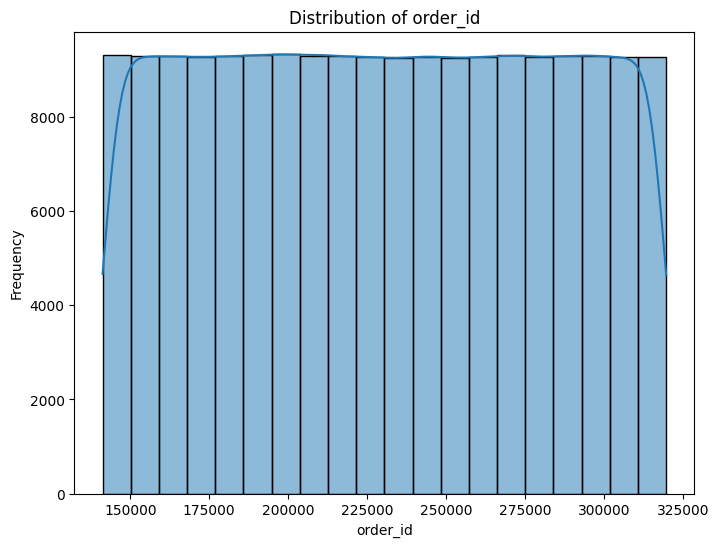

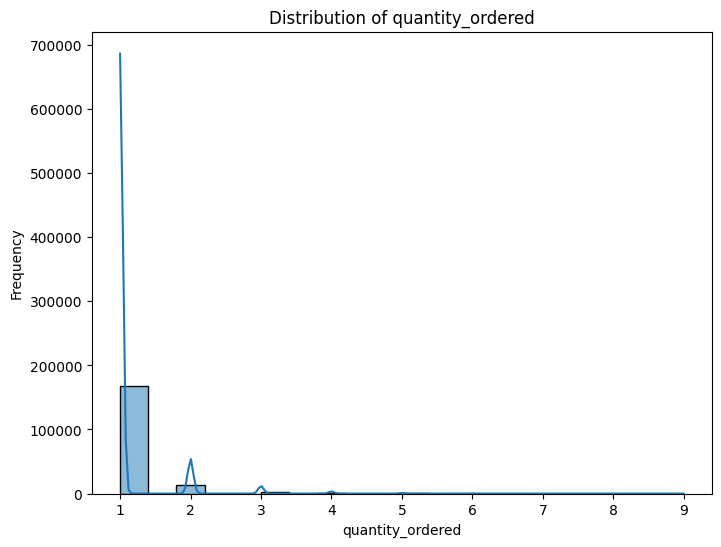

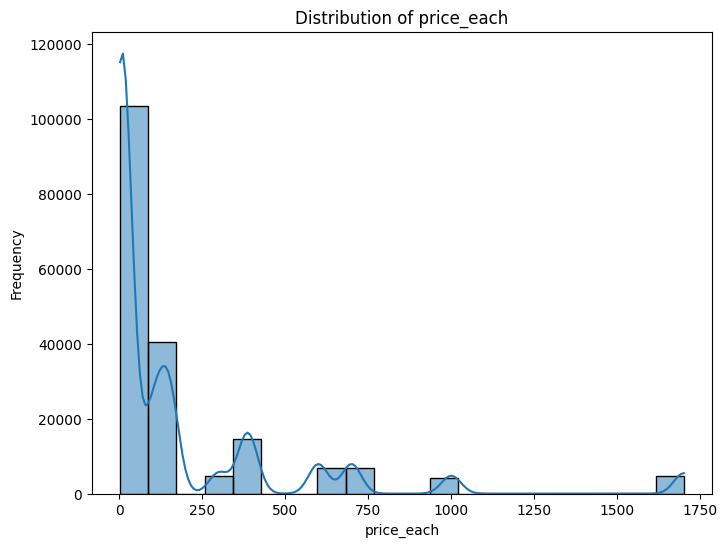

In [37]:
# Visualize distributions using histograms
for var in numerical_statistics:
    plt.figure(figsize=(8, 6))
    sns.histplot(fully_year_data[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


### Analysis for categorical variables

In [38]:
# Selecting only categorical columns
categorical_columns = fully_year_data.select_dtypes(include=['object']).columns

# Looping through each categorical column
for column in categorical_columns:
    # Generating frequency counts for the current column
    frequency_counts = fully_year_data[column].value_counts()
    
    # Printing the frequency counts
    print(f"\nFrequency counts for the '{column}' category:")
    print(frequency_counts)



Frequency counts for the 'product' category:
product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

Frequency counts for the 'purchase_address' category:
purchase_address
193 Forest St, San Francisco, CA 94016    9
279 Sunset St, San Francisco, CA 94016    8
223 Elm St, Los Angeles, CA 90001         8
176 North St, San Francisco, CA 

### Product Category

1. Top-Selling Products: The top-selling products include various accessories such as USB-C Charging Cable, Lightning Charging Cable, and batteries (AAA Batteries and AA Batteries).

2. Popular Electronics: Electronic devices like Wired Headphones, Apple Airpods Headphones, and Bose SoundSport Headphones are also among the top-selling products.

3. Monitors and Smartphones: Monitors (FHD, 4K, and Ultrawide) along with smartphones (iPhone and Google Phone) are present in the list, indicating their popularity among customers.

4. Laptops and Appliances: Macbook Pro Laptop and ThinkPad Laptop are among the top-selling products, and there are also appliances like LG Washing Machine and LG Dryer in the list, though with lower frequencies.

### Purchase Address Category

- Geographical Distribution: The purchase addresses represent diverse locations, including various cities and states, indicating a wide geographical reach of the business.

- Multiple Occurrences: Some purchase addresses occur multiple times in the dataset, suggesting that certain locations may be more popular among customers or may have multiple transactions.

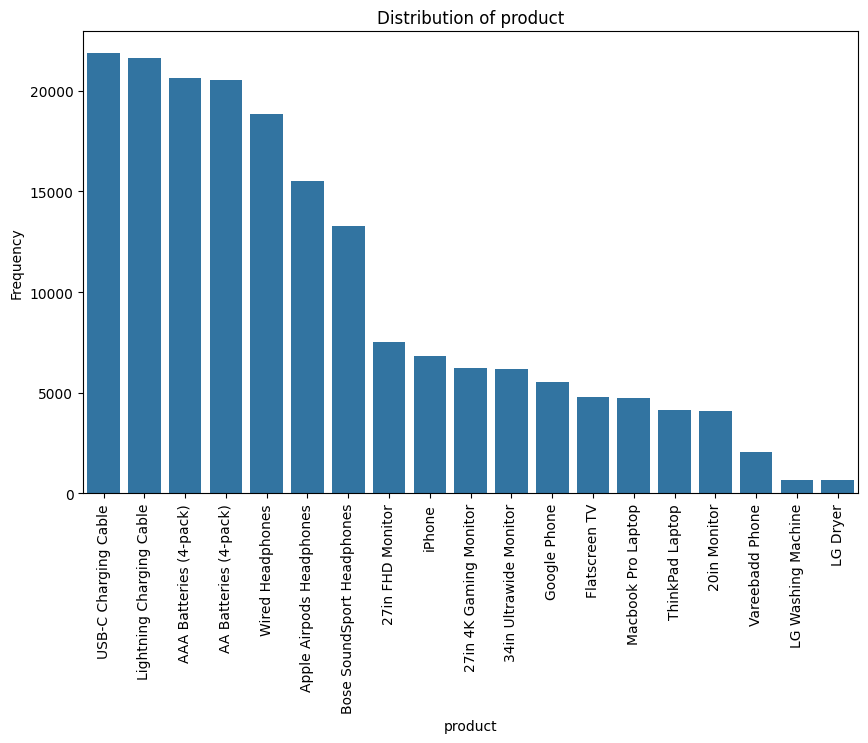

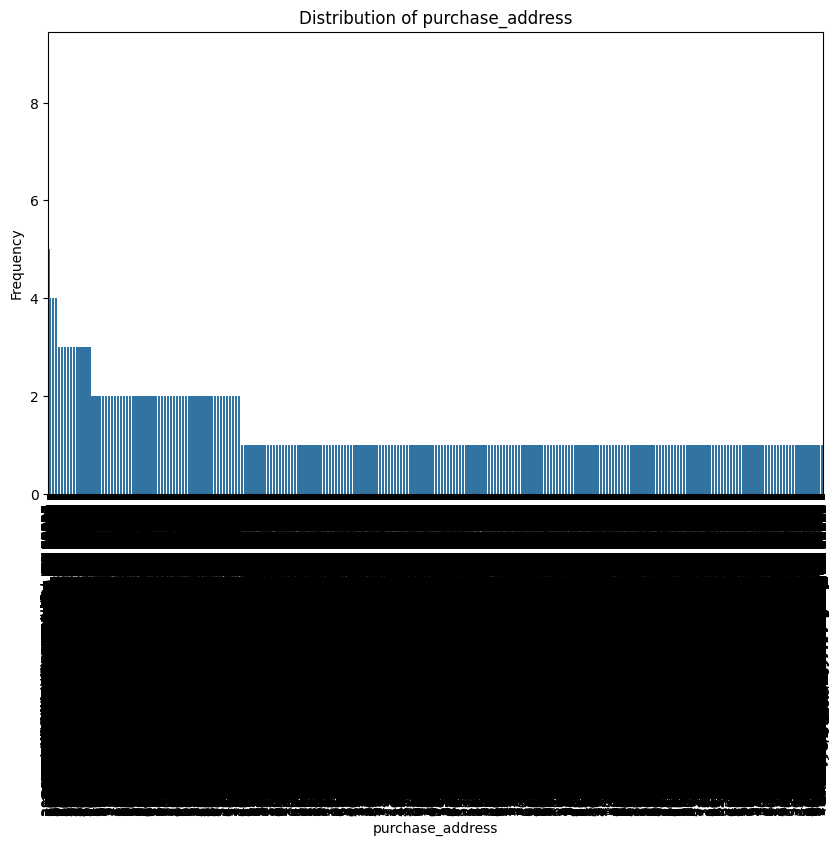

In [39]:

# Visualize distributions using bar plots
for var in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=fully_year_data, x=var, order=fully_year_data[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()


### Bivariate Analysis

In [40]:
# Numeric-Numeric Relationship: Correlation Matrix
numeric_vars = ['quantity_ordered', 'price_each']
numeric_corr = fully_year_data[numeric_vars].corr()


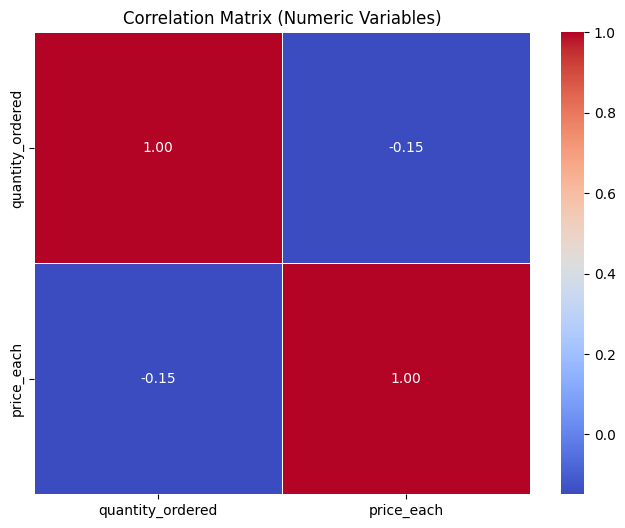

In [41]:

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables)')
plt.show()

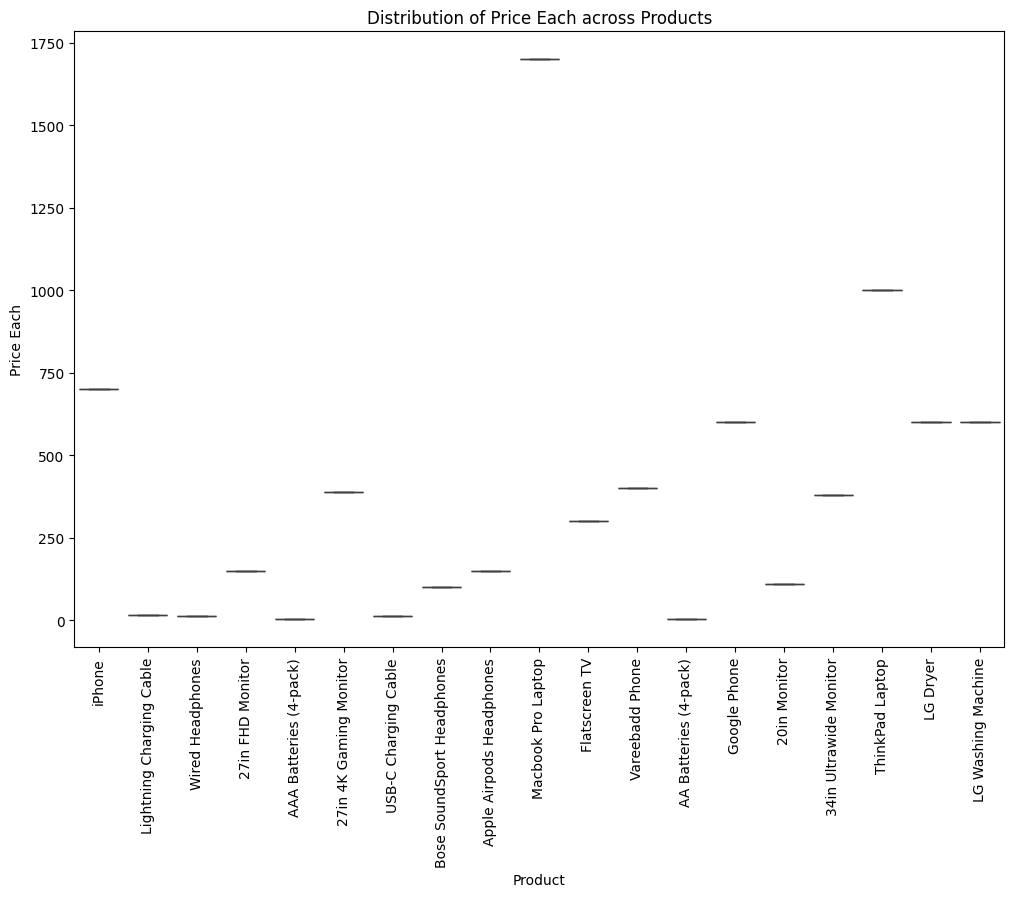

In [42]:
# Categorical-Numeric Relationship: Example with 'product' and 'price_each'
plt.figure(figsize=(12, 8))
sns.boxplot(data=fully_year_data, x='product', y='price_each')
plt.title('Distribution of Price Each across Products')
plt.xlabel('Product')
plt.ylabel('Price Each')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Categorical-Categorical Relationship: Example with 'product' and 'purchase_address'
contingency_table = pd.crosstab(fully_year_data['product'], fully_year_data['purchase_address'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
purchase_address            1 11th St, Atlanta, GA 30301  \
product                                                    
20in Monitor                                           0   
27in 4K Gaming Monitor                                 0   
27in FHD Monitor                                       0   
34in Ultrawide Monitor                                 0   
AA Batteries (4-pack)                                  0   
AAA Batteries (4-pack)                                 0   
Apple Airpods Headphones                               0   
Bose SoundSport Headphones                             0   
Flatscreen TV                                          0   
Google Phone                                           0   
LG Dryer                                               0   
LG Washing Machine                                     0   
Lightning Charging Cable                               0   
Macbook Pro Laptop                                     0   
ThinkPad Laptop      